In [2]:
import pandas as pd
import os
from glob import glob

## combined the files

In [6]:
folder_path = '.'
file_pattern = os.path.join(folder_path, '*_EBAY-US.csv')
csv_files = glob(file_pattern)
print("Matched Files:", csv_files)
print(f"Number of files combined:{len(csv_files)}")

combined_df = pd.concat([pd.read_csv(file) for file in csv_files],ignore_index=True)
print(combined_df.head())

combined_df.to_csv('combines_files.csv', index=False)

Matched Files: ['.\\102380_EBAY-US.csv', '.\\10542_EBAY-US.csv', '.\\10968_EBAY-US.csv', '.\\11232_EBAY-US.csv', '.\\11233_EBAY-US.csv', '.\\116724_EBAY-US.csv', '.\\117419_EBAY-US.csv', '.\\117420_EBAY-US.csv', '.\\117421_EBAY-US.csv', '.\\117422_EBAY-US.csv', '.\\117426_EBAY-US.csv', '.\\12576_EBAY-US.csv', '.\\1281_EBAY-US.csv', '.\\155241_EBAY-US.csv', '.\\156862_EBAY-US.csv', '.\\170098_EBAY-US.csv', '.\\171243_EBAY-US.csv', '.\\172008_EBAY-US.csv', '.\\184488_EBAY-US.csv', '.\\19028_EBAY-US.csv', '.\\1_EBAY-US.csv', '.\\20444_EBAY-US.csv', '.\\20628_EBAY-US.csv', '.\\20710_EBAY-US.csv', '.\\233_EBAY-US.csv', '.\\26395_EBAY-US.csv', '.\\293_EBAY-US.csv', '.\\2984_EBAY-US.csv', '.\\3252_EBAY-US.csv', '.\\36027_EBAY-US.csv', '.\\46782_EBAY-US.csv', '.\\550_EBAY-US.csv', '.\\6000_EBAY-US.csv', '.\\619_EBAY-US.csv', '.\\888_EBAY-US.csv']
Number of files combined:35
                                               Title       Item ID  Price  \
0  ARTLYMERS Christmas Gift Boxes with Lids,

## get the image dimension

In [8]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm  # For progress bar

# Load your dataset
file_path = 'updated_file.csv'  
df = pd.read_csv(file_path)

# Function to fetch image dimensions (pixels)
def get_image_dimensions(url):
    if not isinstance(url, str) or not url.strip():  # Check if URL is empty or invalid
        return "N/A"
    try:
        response = requests.get(url, timeout=5)  # Fetch the image data
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))  # Open the image
            return f"{image.width}x{image.height}"  # Return dimensions as 'widthxheight'
        else:
            return "N/A"  # Return N/A if the request fails
    except Exception as e:
        return "N/A"  # Handle exceptions (e.g., timeout, invalid URL)

# Apply the function to the 'Large Image URL' column
tqdm.pandas()  # Enable progress bar
df['Image Dimensions (Pixels)'] = df['Large Image URL'].progress_apply(get_image_dimensions)

# Save the updated DataFrame to a new CSV file
output_path = 'updated_file_with_image_dimensions.csv'
df.to_csv(output_path, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96989/96989 [6:41:10<00:00,  4.03it/s]


                                               Title       Item ID  Price  \
0  ARTLYMERS Christmas Gift Boxes with Lids, 6 Pa...  156459517297   8.72   
1  Surprise Gift Box Explosion, Merry Christmas S...  286122796716  10.53   
2  Surprise Gifts Box Explosion, Merry Christmas ...  196725804186   9.89   
3  Wondershop Christmas Gift Card Holder Lot of 4...  286139697448   6.99   
4  Christmas Holiday Foil Embossed Gift Card Hold...  186050134800  10.68   

  Currency Condition    Category           Seller  Feedback Score  \
0      USD       New  Gift Boxes          duaapiz            1538   
1      USD       New  Gift Boxes       ethan_coin              40   
2      USD       New  Gift Boxes  shirley_store15              95   
3      USD       New  Gift Boxes    windwalker256            3489   
4      USD       New  Gift Boxes     happlyseller           68438   

   Positive Feedback %  Top Rated Seller  ...  \
0                 99.5              True  ...   
1                 95.2  

### Calculation of Duration in hours, dropping some columns

In [15]:
import pandas as pd

# Load your dataset
file_path = 'updated_file_with_image_dimensions.csv'  
df = pd.read_csv(file_path)

# Step 1: Remove the columns 'Start Time' and 'End Time' before 'Store Name'
columns_to_drop = ['Start Time', 'End Time']
if all(col in df.columns for col in columns_to_drop):
    df = df.drop(columns=columns_to_drop)

# Combine Start Date and Start Hour into a single datetime column
df['Start Datetime'] = pd.to_datetime(df['Start Date'] + ' ' + df['Start Hour'], errors='coerce')

# Combine End Date and End Hour into a single datetime column
df['End Datetime'] = pd.to_datetime(df['End Date'] + ' ' + df['End Hour'], errors='coerce')

# Calculate the duration (difference between End and Start) in hours
df['Duration'] = (df['End Datetime'] - df['Start Datetime']).dt.total_seconds() / 3600  # Convert to hours

# Remove intermediate datetime columns if not needed (optional)
df = df.drop(columns=['Start Datetime', 'End Datetime'])

# Drop the specified columns
columns_to_drop = ['Marketplace','Store Name','Store URL','Gallery URL', 'Large Image URL', 'Super Size Image URL', 'View Item URL']
if all(col in df.columns for col in columns_to_drop):
    df = df.drop(columns=columns_to_drop)


# Step 4: Save the updated DataFrame to a new CSV file
output_path = 'for_modeling.csv'
df.to_csv(output_path, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())


                                               Title       Item ID  Price  \
0  ARTLYMERS Christmas Gift Boxes with Lids, 6 Pa...  156459517297   8.72   
1  Surprise Gift Box Explosion, Merry Christmas S...  286122796716  10.53   
2  Surprise Gifts Box Explosion, Merry Christmas ...  196725804186   9.89   
3  Wondershop Christmas Gift Card Holder Lot of 4...  286139697448   6.99   
4  Christmas Holiday Foil Embossed Gift Card Hold...  186050134800  10.68   

  Currency Condition    Category           Seller  Feedback Score  \
0      USD       New  Gift Boxes          duaapiz            1538   
1      USD       New  Gift Boxes       ethan_coin              40   
2      USD       New  Gift Boxes  shirley_store15              95   
3      USD       New  Gift Boxes    windwalker256            3489   
4      USD       New  Gift Boxes     happlyseller           68438   

   Positive Feedback %  Top Rated Seller Shipping Type  Shipping Cost  \
0                 99.5              True         

Frequency Distribution of Duration Intervals:
Duration Interval
0-700          1162
701-900       40245
901-1200          0
1201-1500      7920
1501-2000         0
2001-3000      8072
3001-5000      3369
5001-10000    12755
10001+        23466
Name: count, dtype: int64


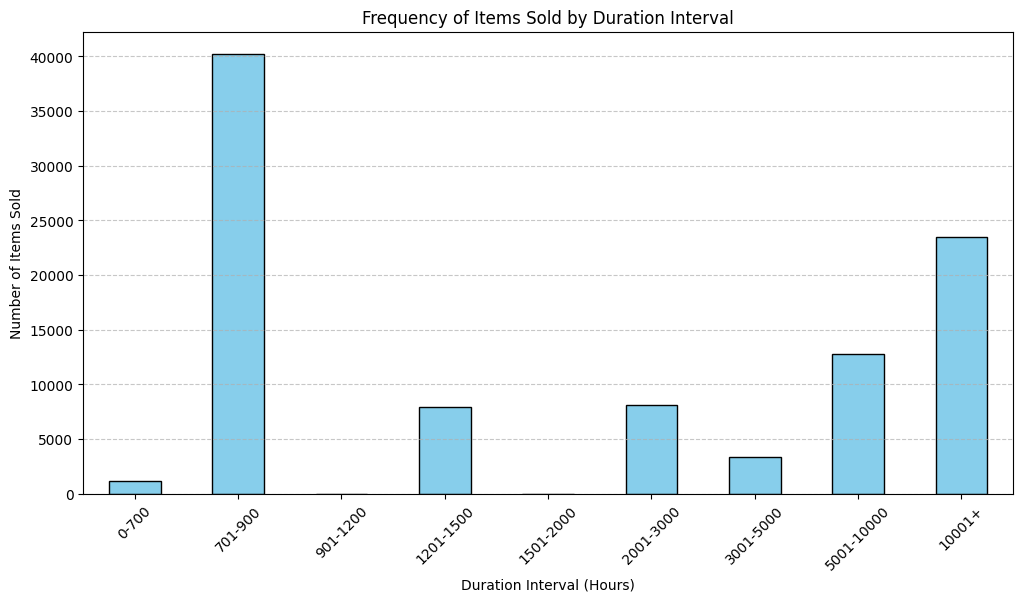

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'for_modeling.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Define Duration Intervals
# Customize bins for desired intervals (e.g., 500-700, 701-900, etc.)
bins = [0, 700, 900, 1200, 1500, 2000, 3000, 5000, 10000, df['Duration'].max()]
labels = ['0-700', '701-900', '901-1200', '1201-1500', '1501-2000', 
          '2001-3000', '3001-5000', '5001-10000', '10001+']

# Categorize 'Duration' into intervals
df['Duration Interval'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=True)

# Step 2: Count Frequency for Each Interval
duration_frequency = df['Duration Interval'].value_counts().sort_index()

# Display Frequency Distribution
print("Frequency Distribution of Duration Intervals:")
print(duration_frequency)

# Step 3: Visualize the Frequency Distribution
plt.figure(figsize=(12, 6))
duration_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Items Sold by Duration Interval')
plt.xlabel('Duration Interval (Hours)')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Save the frequency distribution to a CSV file
frequency_df = duration_frequency.reset_index()
frequency_df.columns = ['Duration Interval', 'Frequency']
frequency_df.to_csv('duration_frequency.csv', index=False)


C:\Users\Joyce\AppData\Local\Temp\ipykernel_17304\1463052760.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_shipping = df.groupby(['Duration Bin', 'Shipping Type']).size().unstack(fill_value=0)


Relationship Between Duration (Bins) and Shipping Type:
Shipping Type  Calculated  CalculatedDomesticFlatInternational  Flat  \
Duration Bin                                                           
0-500                 426                                    0   282   
501-700                 6                                    0     3   
701-900              4274                                   24  5132   
901-1200                0                                    0     0   
1201-1500            2831                                   11  1344   
1501-2000               0                                    0     0   
2001-3000            2138                                    2  1563   
3001-5000             936                                    2  1305   
5001-10000           4116                                   14  3264   
10001+               5275                                   12  7908   

Shipping Type  FlatDomesticCalculatedInternational   Free  FreePickup  \
Durati

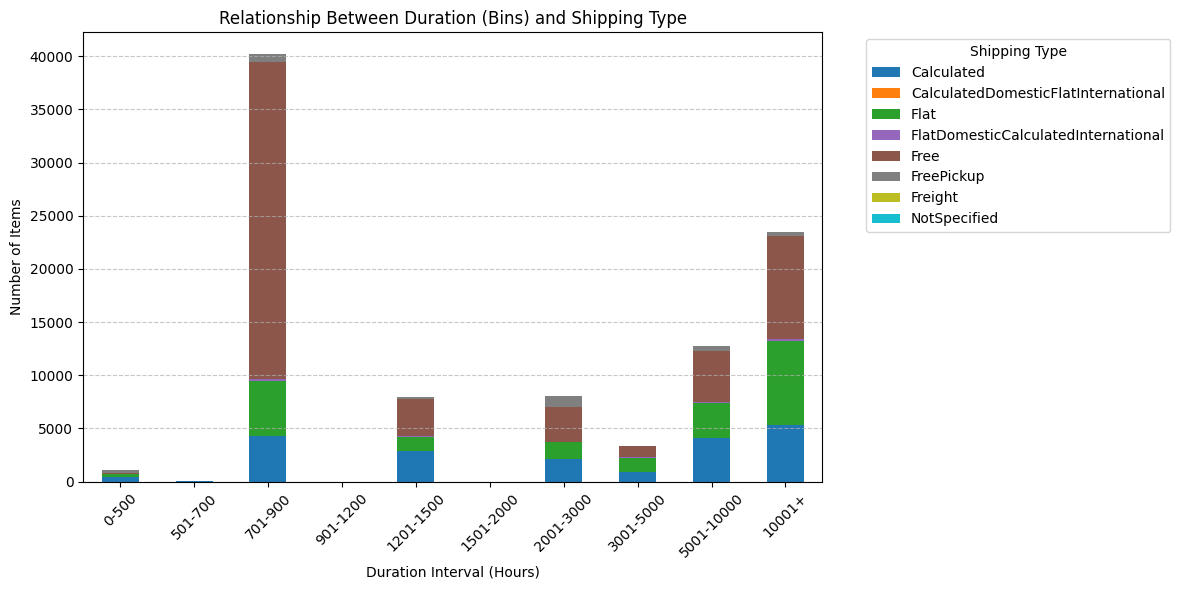

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'for_modeling.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Define Duration Intervals (Bins)
bins = [0, 500, 700, 900, 1200, 1500, 2000, 3000, 5000, 10000, df['Duration'].max()]
labels = ['0-500', '501-700', '701-900', '901-1200', '1201-1500', '1501-2000', 
          '2001-3000', '3001-5000', '5001-10000', '10001+']

df['Duration Bin'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=True)

# Step 2: Group Data by `Duration Bin` and `Shipping Type`
duration_shipping = df.groupby(['Duration Bin', 'Shipping Type']).size().unstack(fill_value=0)

# Display the relationship
print("Relationship Between Duration (Bins) and Shipping Type:")
print(duration_shipping)

# Step 3: Visualize the Relationship
# Stacked Bar Chart
duration_shipping.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Relationship Between Duration (Bins) and Shipping Type')
plt.xlabel('Duration Interval (Hours)')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.legend(title='Shipping Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Save the grouped data to a CSV file
duration_shipping.to_csv('duration_shipping_relationship.csv', index=True)


Average Positive Feedback % by Duration Bin:
Duration Bin
0-500         98.059517
501-700       51.553488
701-900       96.421816
901-1200            NaN
1201-1500     97.076414
1501-2000           NaN
2001-3000     89.374715
3001-5000     98.544820
5001-10000    98.197483
10001+        97.961928
Name: Positive Feedback %, dtype: float64


C:\Users\Joyce\AppData\Local\Temp\ipykernel_17304\3167892667.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_feedback_avg = df.groupby('Duration Bin')['Positive Feedback %'].mean()


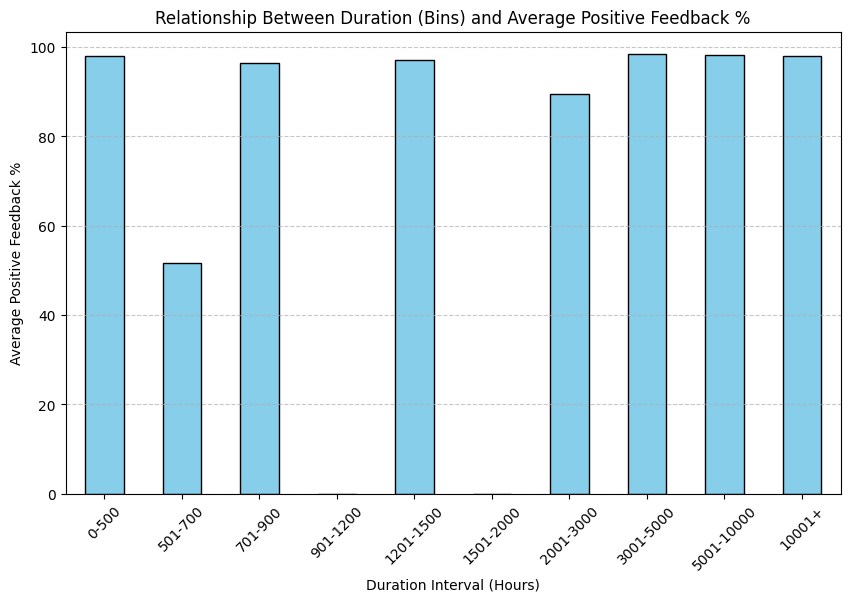

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'for_modeling.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Define Duration Intervals (Bins)
bins = [0, 500, 700, 900, 1200, 1500, 2000, 3000, 5000, 10000, df['Duration'].max()]
labels = ['0-500', '501-700', '701-900', '901-1200', '1201-1500', '1501-2000', 
          '2001-3000', '3001-5000', '5001-10000', '10001+']

df['Duration Bin'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=True)

# Step 2: Group Data by `Duration Bin` and Calculate Average Positive Feedback %
positive_feedback_avg = df.groupby('Duration Bin')['Positive Feedback %'].mean()

# Display the relationship
print("Average Positive Feedback % by Duration Bin:")
print(positive_feedback_avg)

# Step 3: Visualize the Relationship
# Bar Chart
plt.figure(figsize=(10, 6))
positive_feedback_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Relationship Between Duration (Bins) and Average Positive Feedback %')
plt.xlabel('Duration Interval (Hours)')
plt.ylabel('Average Positive Feedback %')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Save the grouped data to a CSV file
positive_feedback_avg.to_csv('duration_positive_feedback_relationship.csv', index=True)
